## Задание к занятию «Временные ряды, общая теория» - часть2
Дмитрий Каннуников

Описание задания:
Найти на сайте 2 временных ряда, которые больше всего понравятся и сделать их стационарными. Работу оформить, как сделано в шаблоне "Пример полноценного анализа".

In [73]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import boxcox
%matplotlib inline

In [74]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [75]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

## Годовая скорость обращения денег, 1869-1970

In [76]:
series = pd.read_csv("./data/annual-velocity-of-money-1869-to.csv")['Annual velocity of money, 1869 to 1970']

Results of Dickey-Fuller Test:
Test Statistic                  -3.284241
p-value                          0.015598
#Lags Used                       0.000000
Number of Observations Used    101.000000
Critical Value (1%)             -3.496818
Critical Value (5%)             -2.890611
Critical Value (10%)            -2.582277
dtype: float64


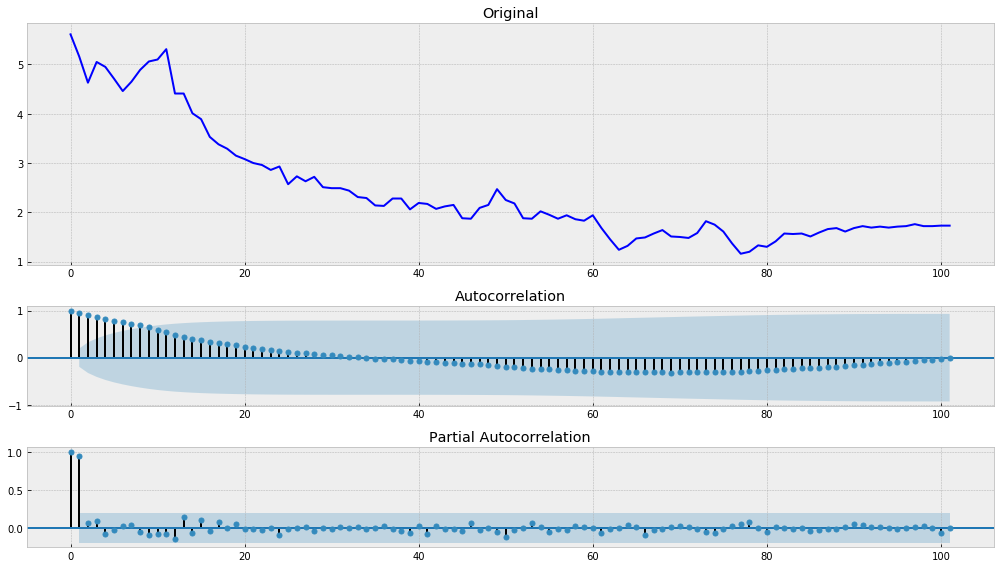

In [77]:
tsplot(series)

Как мы видим, и тест Дики-Фуллера и графики коррелограмм не отвергают гипотезу о нестационарности ряда. Ряд имеет тренд.
Сделаем преобразования Бокса-Кокса

In [78]:
series = boxcox(series, 0)

Results of Dickey-Fuller Test:
Test Statistic                 -2.366289
p-value                         0.151478
#Lags Used                      4.000000
Number of Observations Used    97.000000
Critical Value (1%)            -3.499637
Critical Value (5%)            -2.891831
Critical Value (10%)           -2.582928
dtype: float64


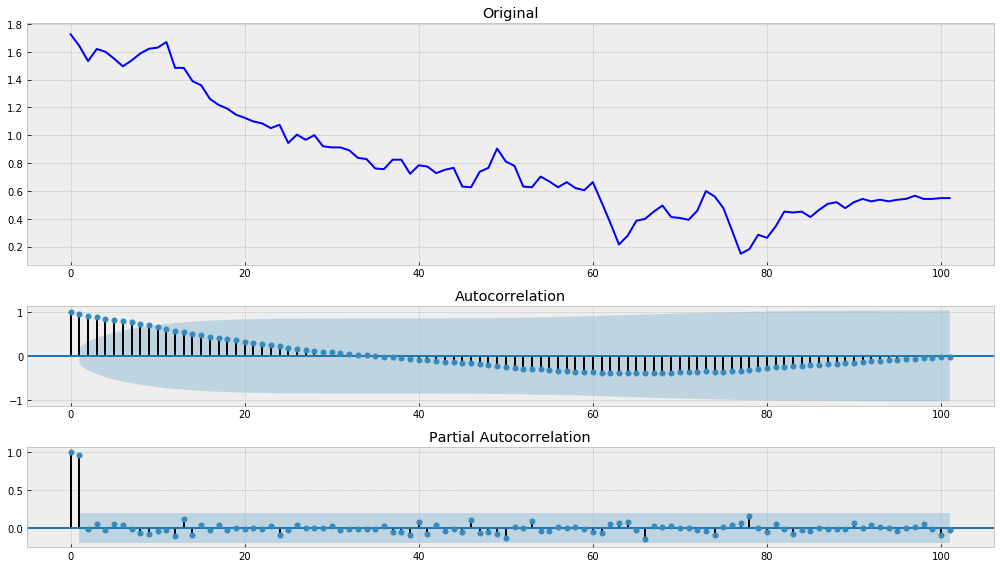

In [79]:
tsplot(series)

Преобразование Бокса-Кокса не дает никакого эффекта. Уберем тренд его дифференцированием.

In [80]:
series = series[1:] - series[:-1]

Results of Dickey-Fuller Test:
Test Statistic                -8.908015e+00
p-value                        1.124016e-14
#Lags Used                     0.000000e+00
Number of Observations Used    1.000000e+02
Critical Value (1%)           -3.497501e+00
Critical Value (5%)           -2.890906e+00
Critical Value (10%)          -2.582435e+00
dtype: float64


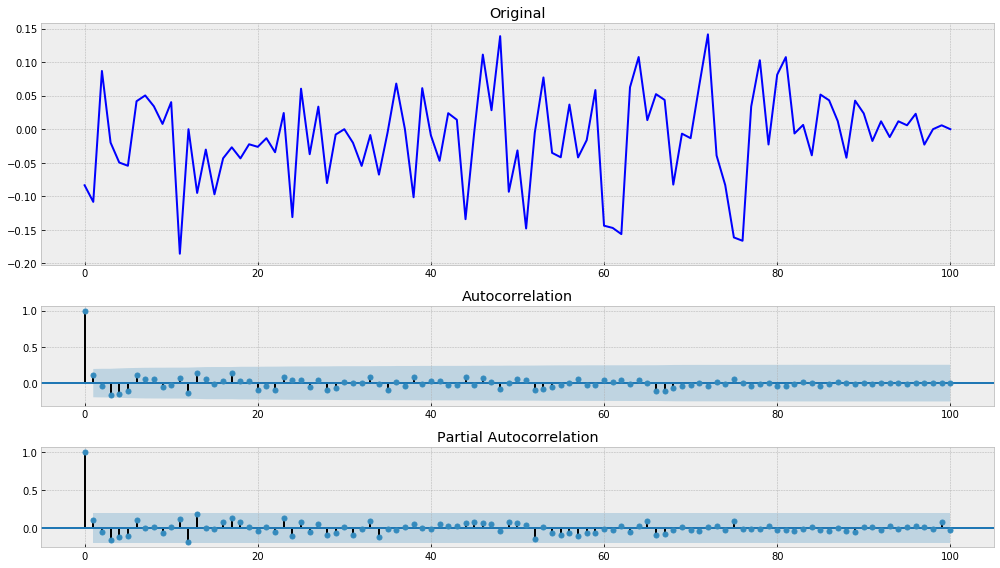

In [81]:
tsplot(series)

Ряд стал стационарным